In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')

<h4>Reading dataset</h4>
<p>
In the first step we read the dataset and also printed the correlation between other features with label.
</p>

In [2]:
df = pd.read_csv('datasets/ds13.csv')
correlations = df.corrwith(df['LABEL'], method="pearson")
print(f"Correlations with LABEL:\n", correlations)

Correlations with LABEL:
 COD_ID_PRODT_x                 0.092900
PCDEF_PROCESS_DEFINITION_ID    0.005729
SHIFT                         -0.013853
TEAM                          -0.003655
ITMDF_COD_ITM_ITMDF           -0.003878
VAL_ITM_N_PRITM                0.002634
LADEL                          0.002395
TUNDISH                       -0.003284
SHELL                         -0.003960
DAT_PRODT                      0.006124
PROCESS_DURATION               0.004253
LABEL                          1.000000
dtype: float64


In [3]:
df = df.to_numpy(dtype=np.longlong)
X = df[:,:-1]
y = df[:,-1].flatten()
classes = np.unique(y)

<h4>Missing values</h4>
<p>
One of the features we kept during dataset generation was VAL_ITM_N_PRITM which included some missing values, but since we deemed this feature usefull we are going to fill these missing values instead of getting rid of them.
</p>
<p>
To address data incompleteness, we performed missing data imputation by means of the Multivariate Imputation by Chained Equation (MICE)
</p>

In [4]:
imp = IterativeImputer(max_iter=300, random_state=0)
imp.fit(X)
X = np.round(imp.transform(X), 1)

<h4>Data normalization</h4>
<p>
For data normalization we used StandardScaler which standardize features by removing the mean and scaling to unit variance.
</p>

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.01)

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def report_results(y_test, y_pred, classes):
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(len(classes)), range(len(classes)))
    plt.figure(figsize = (8, 6))
    sns.set(font_scale=0.5) # for label size
    sns.heatmap(df_cm, annot=True, fmt='d', cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
    plt.title('Confusion matrix (Percentage)', fontsize = 15)
    plt.xlabel('Predicted', fontsize = 12)
    plt.ylabel('Actual/True', fontsize = 12) 
    plt.tight_layout()
    plt.show()

    target_names = [f'class {i}' for i in range(len(classes))]
    print(classification_report(y_test, y_pred, target_names=target_names))

<h3>Trying algorthims on dataset</h3>
<p>
In the next sections we are going to try different algorthms and report the results. We will mark the best ones with ✅ and the ones that didn't work with ❌ sign.
</p>

<h4>❌ Logistic Regression</h4>
<p>
Didn't work well. Reason: low accuracy
</p>

In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

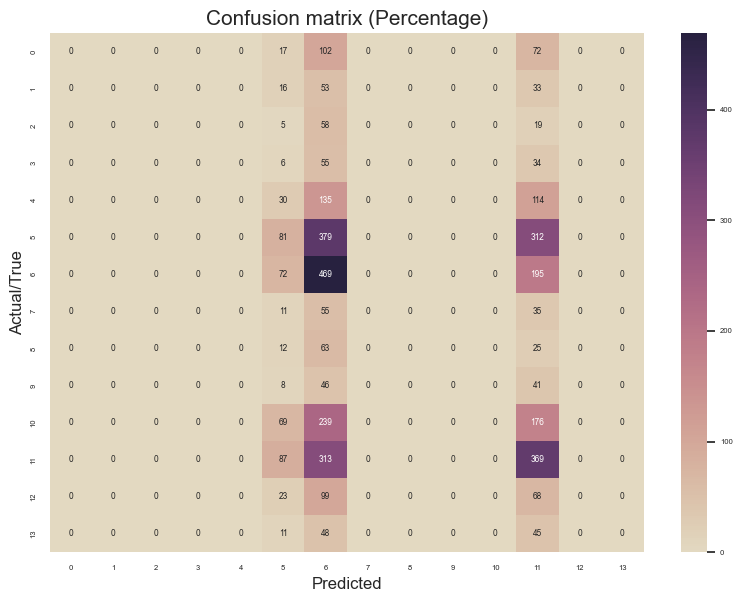

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       191
     class 1       0.00      0.00      0.00       102
     class 2       0.00      0.00      0.00        82
     class 3       0.00      0.00      0.00        95
     class 4       0.00      0.00      0.00       279
     class 5       0.18      0.10      0.13       772
     class 6       0.22      0.64      0.33       736
     class 7       0.00      0.00      0.00       101
     class 8       0.00      0.00      0.00       100
     class 9       0.00      0.00      0.00        95
    class 10       0.00      0.00      0.00       484
    class 11       0.24      0.48      0.32       769
    class 12       0.00      0.00      0.00       190
    class 13       0.00      0.00      0.00       104

    accuracy                           0.22      4100
   macro avg       0.05      0.09      0.06      4100
weighted avg       0.12      0.22      0.14      4100



In [77]:
report_results(y_test, y_pred, classes)

<h4>❌ QDA</h4>
<p>
Didn't work well. Reason: low accuracy.
</p>

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

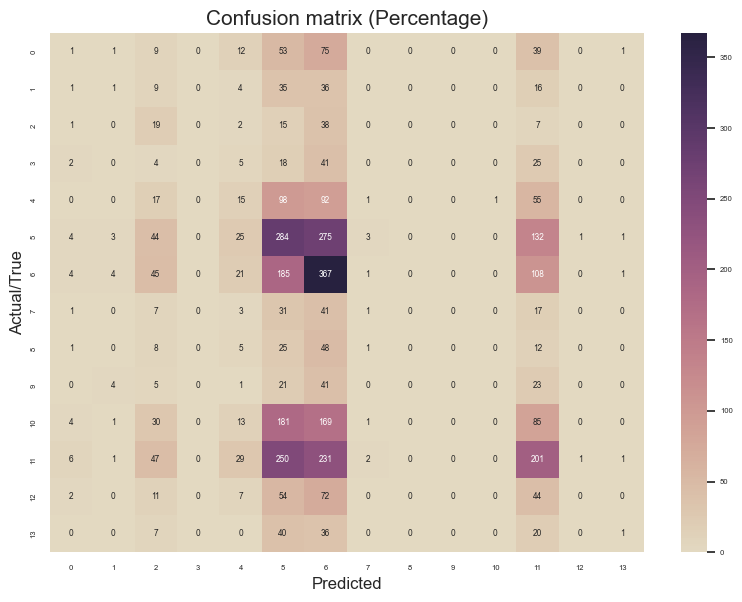

              precision    recall  f1-score   support

     class 0       0.04      0.01      0.01       191
     class 1       0.07      0.01      0.02       102
     class 2       0.07      0.23      0.11        82
     class 3       0.00      0.00      0.00        95
     class 4       0.11      0.05      0.07       279
     class 5       0.22      0.37      0.28       772
     class 6       0.23      0.50      0.32       736
     class 7       0.10      0.01      0.02       101
     class 8       0.00      0.00      0.00       100
     class 9       0.00      0.00      0.00        95
    class 10       0.00      0.00      0.00       484
    class 11       0.26      0.26      0.26       769
    class 12       0.00      0.00      0.00       190
    class 13       0.20      0.01      0.02       104

    accuracy                           0.22      4100
   macro avg       0.09      0.10      0.08      4100
weighted avg       0.15      0.22      0.17      4100



In [9]:
report_results(y_test, y_pred, classes)

<h4>❌ SVM</h4>
<p>
Took too much time to train. (More than 2 hours)
</p>

In [8]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
report_results(y_test, y_pred, classes)

<h4>✅ XGBoost</h4>
<p>
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework.

Training time: 12m 3.6s
</p>

In [31]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = [round(value) for value in y_pred]

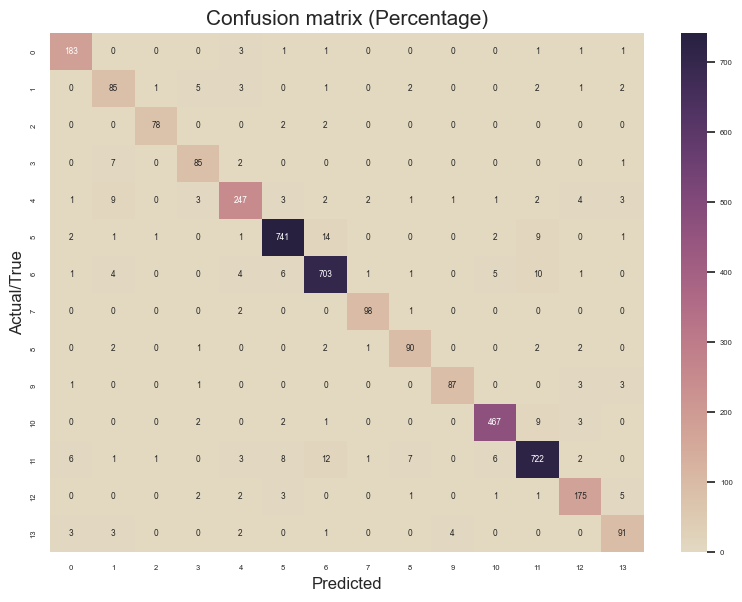

              precision    recall  f1-score   support

     class 0       0.93      0.96      0.94       191
     class 1       0.76      0.83      0.79       102
     class 2       0.96      0.95      0.96        82
     class 3       0.86      0.89      0.88        95
     class 4       0.92      0.89      0.90       279
     class 5       0.97      0.96      0.96       772
     class 6       0.95      0.96      0.95       736
     class 7       0.95      0.97      0.96       101
     class 8       0.87      0.90      0.89       100
     class 9       0.95      0.92      0.93        95
    class 10       0.97      0.96      0.97       484
    class 11       0.95      0.94      0.95       769
    class 12       0.91      0.92      0.92       190
    class 13       0.85      0.88      0.86       104

    accuracy                           0.94      4100
   macro avg       0.91      0.92      0.92      4100
weighted avg       0.94      0.94      0.94      4100



In [32]:
report_results(y_test, y_pred, classes)

<h3>❌ Neural Network</h3>
<p>Reason: slow and low accuracy</p>

In [74]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', max_iter=2500, alpha=1e-5, hidden_layer_sizes=(14, 14), random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

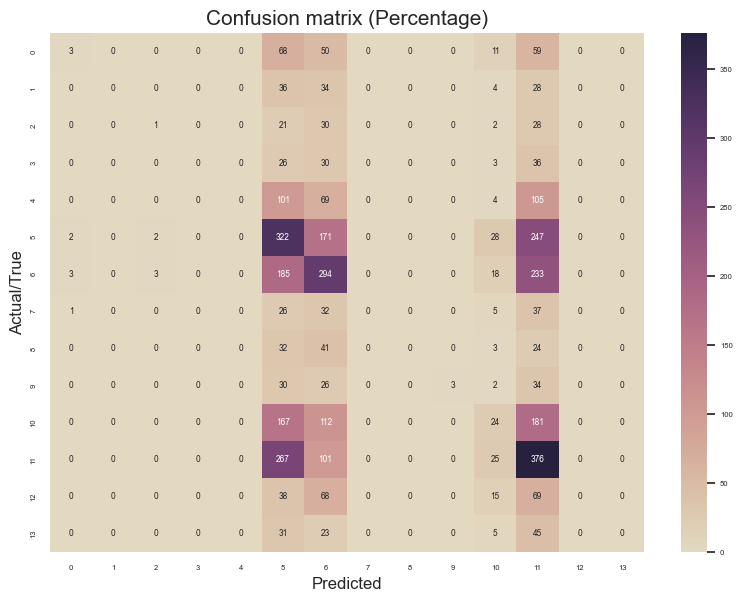

              precision    recall  f1-score   support

     class 0       0.33      0.02      0.03       191
     class 1       0.00      0.00      0.00       102
     class 2       0.17      0.01      0.02        82
     class 3       0.00      0.00      0.00        95
     class 4       0.00      0.00      0.00       279
     class 5       0.24      0.42      0.30       772
     class 6       0.27      0.40      0.32       736
     class 7       0.00      0.00      0.00       101
     class 8       0.00      0.00      0.00       100
     class 9       1.00      0.03      0.06        95
    class 10       0.16      0.05      0.08       484
    class 11       0.25      0.49      0.33       769
    class 12       0.00      0.00      0.00       190
    class 13       0.00      0.00      0.00       104

    accuracy                           0.25      4100
   macro avg       0.17      0.10      0.08      4100
weighted avg       0.20      0.25      0.19      4100



In [75]:
report_results(y_test, y_pred, classes)

<h4>✅ Random Forest</h4>
<p>
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
</p>
<p>
We didn't set max_depth bacause according to sklearn docs: If it is set to None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
</p>
<p>Training time: 2m 1.1s</p>

In [72]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

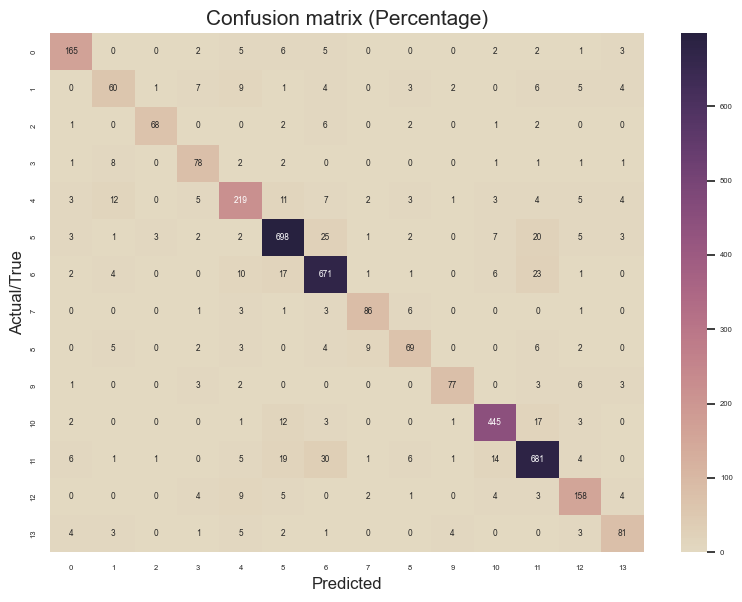

              precision    recall  f1-score   support

     class 0       0.88      0.86      0.87       191
     class 1       0.64      0.59      0.61       102
     class 2       0.93      0.83      0.88        82
     class 3       0.74      0.82      0.78        95
     class 4       0.80      0.78      0.79       279
     class 5       0.90      0.90      0.90       772
     class 6       0.88      0.91      0.90       736
     class 7       0.84      0.85      0.85       101
     class 8       0.74      0.69      0.72       100
     class 9       0.90      0.81      0.85        95
    class 10       0.92      0.92      0.92       484
    class 11       0.89      0.89      0.89       769
    class 12       0.81      0.83      0.82       190
    class 13       0.79      0.78      0.78       104

    accuracy                           0.87      4100
   macro avg       0.83      0.82      0.83      4100
weighted avg       0.87      0.87      0.87      4100



In [73]:
report_results(y_test, y_pred, classes)

<h4>✅ CatBoost</h4>
<p>
CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.
</p>
<p>Training time: 1m 24.6s</p>

In [56]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=1000,
                           task_type="GPU",
                           devices='0:1',
                           loss_function='MultiClass')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Learning rate set to 0.221003
0:	learn: 2.4162168	total: 80.3ms	remaining: 1m 20s
1:	learn: 2.3220564	total: 158ms	remaining: 1m 18s
2:	learn: 2.2621110	total: 239ms	remaining: 1m 19s
3:	learn: 2.2251240	total: 321ms	remaining: 1m 19s
4:	learn: 2.1945454	total: 403ms	remaining: 1m 20s
5:	learn: 2.1705887	total: 485ms	remaining: 1m 20s
6:	learn: 2.1526799	total: 567ms	remaining: 1m 20s
7:	learn: 2.1349300	total: 650ms	remaining: 1m 20s
8:	learn: 2.1210766	total: 731ms	remaining: 1m 20s
9:	learn: 2.1073895	total: 818ms	remaining: 1m 21s
10:	learn: 2.0969841	total: 895ms	remaining: 1m 20s
11:	learn: 2.0824702	total: 981ms	remaining: 1m 20s
12:	learn: 2.0695167	total: 1.06s	remaining: 1m 20s
13:	learn: 2.0608852	total: 1.15s	remaining: 1m 20s
14:	learn: 2.0477120	total: 1.23s	remaining: 1m 21s
15:	learn: 2.0404278	total: 1.31s	remaining: 1m 20s
16:	learn: 2.0278700	total: 1.4s	remaining: 1m 21s
17:	learn: 2.0201992	total: 1.49s	remaining: 1m 21s
18:	learn: 2.0092166	total: 1.58s	remaining:

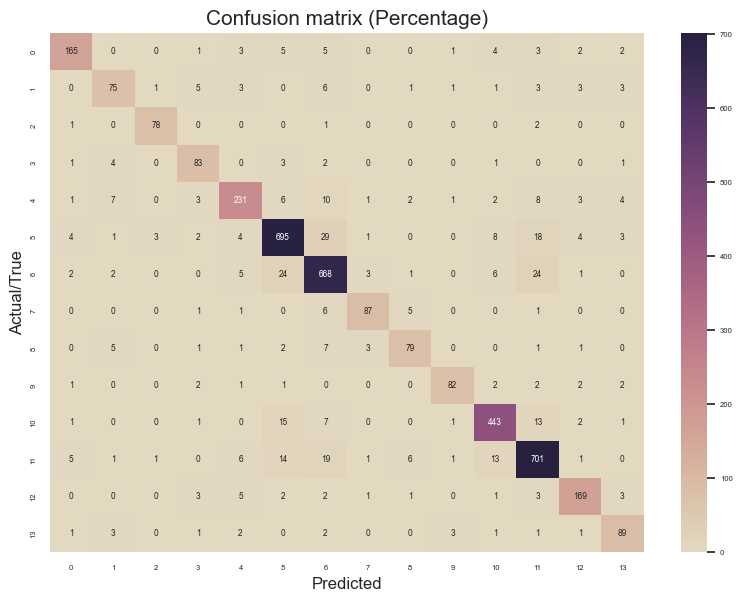

              precision    recall  f1-score   support

     class 0       0.91      0.86      0.88       191
     class 1       0.77      0.74      0.75       102
     class 2       0.94      0.95      0.95        82
     class 3       0.81      0.87      0.84        95
     class 4       0.88      0.83      0.85       279
     class 5       0.91      0.90      0.90       772
     class 6       0.87      0.91      0.89       736
     class 7       0.90      0.86      0.88       101
     class 8       0.83      0.79      0.81       100
     class 9       0.91      0.86      0.89        95
    class 10       0.92      0.92      0.92       484
    class 11       0.90      0.91      0.91       769
    class 12       0.89      0.89      0.89       190
    class 13       0.82      0.86      0.84       104

    accuracy                           0.89      4100
   macro avg       0.88      0.87      0.87      4100
weighted avg       0.89      0.89      0.89      4100



In [57]:
report_results(y_test, y_pred, classes)

<h4>✅ LightGBM</h4>
<p>
LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:
</p>
<ul>
    <li>Faster training speed and higher efficiency.</li>
    <li>Lower memory usage.</li>
    <li>Capable of handling large-scale data.</li>
    <li>Support of parallel, distributed, and GPU learning.</li>
</ul>
<p>
In XGBoost, trees grow depth-wise while in LightGBM, trees grow leaf-wise which is the fundamental difference between the two frameworks.
</p>
<p>Training time: 1m 43.1s</p>

In [45]:
import lightgbm as lgb

model = lgb.LGBMClassifier(objective='multiclass', n_estimators=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

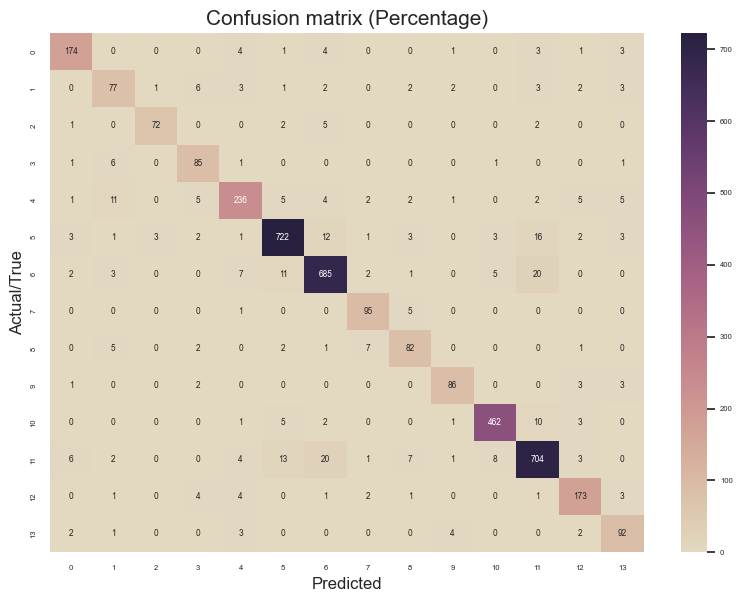

              precision    recall  f1-score   support

     class 0       0.91      0.91      0.91       191
     class 1       0.72      0.75      0.74       102
     class 2       0.95      0.88      0.91        82
     class 3       0.80      0.89      0.85        95
     class 4       0.89      0.85      0.87       279
     class 5       0.95      0.94      0.94       772
     class 6       0.93      0.93      0.93       736
     class 7       0.86      0.94      0.90       101
     class 8       0.80      0.82      0.81       100
     class 9       0.90      0.91      0.90        95
    class 10       0.96      0.95      0.96       484
    class 11       0.93      0.92      0.92       769
    class 12       0.89      0.91      0.90       190
    class 13       0.81      0.88      0.85       104

    accuracy                           0.91      4100
   macro avg       0.88      0.89      0.88      4100
weighted avg       0.91      0.91      0.91      4100



In [46]:
report_results(y_test, y_pred, classes)

<h3>Conclusion</h3>
<h4>What algorithm to choose?</h4>
<p>
There were up and downs in each successful algorithm we tried. We also tried some of these algorithms on 23 classes dataset which covered 98% of slabs but still the best results was achived through 14 classes dataset.
</p>
<p>We believe LightGBM had the best results even though Its accuracy was three percent less than XGBoost, it was way faster than that. it took around 100 seconds for LightGBM to train while it took around 12 minutes for XGBoost.</p>